In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import cv2
from sklearn.model_selection import train_test_split
from skimage.metrics import structural_similarity as ssim

In [ ]:
from google.colab import drive
import os



drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the CSV data
# Replace with your own path
# Get the current working directory
current_directory = os.getcwd()

print("Current Working Directory:", current_directory)

folders = [f for f in os.listdir(current_directory) if os.path.isdir(os.path.join(current_directory, f))]

print("Folders in the Current Working Directory:", folders)

directory_path = '/content/drive/MyDrive'

contents = os.listdir(directory_path)

print("Folders and Files in", directory_path, ":", contents)

mnist_data = pd.read_csv('/content/drive/MyDrive/mnist.csv').values

Current Working Directory: /content
Folders in the Current Working Directory: ['.config', 'drive', 'sample_data']
Folders and Files in /content/drive/MyDrive : ['Colab Notebooks', 'mnist.csv']


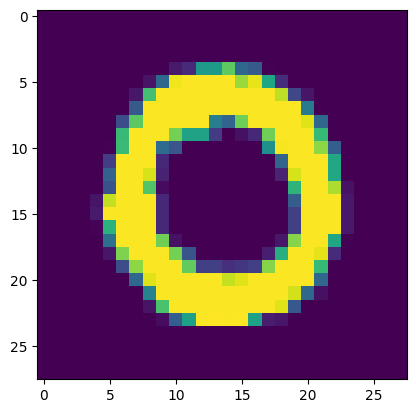

In [ ]:
# Extract the image data (digits) and the labels

labels = mnist_data[:, 0]
digits = mnist_data[:, 1:]
#print(digits[0])
img_size = 28
plt.imshow(digits[1].reshape(img_size, img_size))
plt.show()

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Majority class
counts = np.bincount(labels)
print(counts)
max_label = np.argmax(counts)
print("The majority label is:", max_label, "with",counts[max_label], "instances.")
max_counts = counts[max_label]
print(max_counts)
print(len(labels))

[4132 4684 4177 4351 4072 3795 4137 4401 4063 4188]
The majority label is: 1 with 4684 instances.
4684
42000


In [ ]:
accuracy_majority_label = max_counts / len(labels)
print(f"The accuracy when predicting the majority label is: {accuracy_majority_label:.4f} or {(accuracy_majority_label*100):.1f}%")

The accuracy when predicting the majority label is: 0.1115 or 11.2%


In [ ]:
#---------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Calculate the sum of each pixel in all images

sum_pixels = np.sum(digits, axis=0)

In [ ]:
sum_pixels.shape

(784,)

In [ ]:
sum_pixels = sum_pixels.reshape(-1,1)

In [ ]:
sum_pixels.shape

(784, 1)

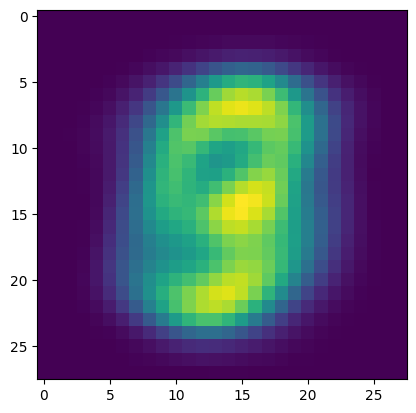

In [ ]:
plt.imshow(sum_pixels.reshape(img_size, img_size))
plt.show()

In [ ]:
zero_pixels = np.array([num for num, i in enumerate(sum_pixels) if sum_pixels[num]==0])

print(f"{len(zero_pixels)} pixels have zero value.")
print(f"These pixels are: {list(zero_pixels)}")

76 pixels have zero value.
These pixels are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 52, 53, 54, 55, 56, 57, 82, 83, 84, 85, 111, 112, 139, 140, 141, 168, 196, 392, 420, 421, 448, 476, 532, 560, 644, 645, 671, 672, 673, 699, 700, 701, 727, 728, 729, 730, 731, 754, 755, 756, 757, 758, 759, 760, 780, 781, 782, 783]


In [ ]:
# Create an image with the ones that has sum=0 as 0 and the ones that have sum>0 as 254

zero_nozero = np.zeros(digits.shape[1])
for n, _ in enumerate(sum_pixels):
  if n not in zero_pixels:
    zero_nozero[n] = 254

In [ ]:
counts_nonzero = np.count_nonzero(zero_nozero)
counts_zero = digits.shape[1] - counts_nonzero
print(counts_zero)

76


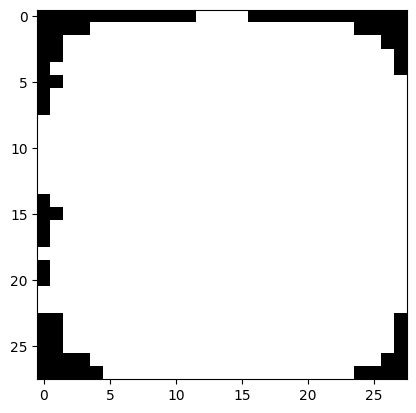

In [ ]:
plt.imshow(zero_nozero.reshape(img_size, img_size), cmap='gray')
plt.show()

In [ ]:
# There is not a consistent frame so we can remove it from the image

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------

In [ ]:
### Ink ###

# create ink feature
ink = np.array([sum(row) for row in digits])
# compute mean for each digit class
ink_mean = np.array([np.mean(ink[labels == i]) for i in range(10)])
print(ink_mean)
# compute standard deviation for each digit class
ink_std = np.array([np.std(ink[labels == i]) for i in range(10)])

[34632.40755082 15188.46626815 29871.0993536  28320.18800276
 24232.72249509 25835.92042161 27734.9173314  22931.24426267
 30184.1484125  24553.75      ]


In [ ]:
# FIND THE MIN AND MAX INC FOR EACH DIGIT

# Min values

ink_min_values = []
min_indices = []

for i in range(10):
    # Select only the elements of the current digit
    mask = labels == i

    # Applying the mask to the ink array to get ink values for the current digit
    digit_ink = ink[mask]

    # Finding the minimum ink value for the current digit
    min_ink_value = np.min(digit_ink)
    ink_min_values.append(min_ink_value)

    # Finding the index of the minimum ink value within the masked array
    # and then finding the corresponding index in the original array
    min_index = np.where(ink == min_ink_value)[0][np.where(labels[np.where(ink == min_ink_value)[0]] == i)[0][0]]
    min_indices.append(min_index)


# Max values

ink_max_values = []
max_indices = []

for i in range(10):
    # Select only the elements of the current digit
    mask = labels == i

    # Applying the mask to the ink array to get ink values for the current digit
    digit_ink = ink[mask]

    # Finding the maximum ink value for the current digit
    max_ink_value = np.max(digit_ink)
    ink_max_values.append(max_ink_value)

    # Finding the index of the maximum ink value within the masked array
    # and then finding the corresponding index in the original array
    max_index = np.where(ink == max_ink_value)[0][np.where(labels[np.where(ink == max_ink_value)[0]] == i)[0][0]]
    max_indices.append(max_index)

print(min_indices)
print(max_indices)

[11292, 19036, 34987, 35494, 37544, 17370, 20026, 25489, 25619, 5166]
[8062, 897, 40976, 33356, 19607, 7471, 24218, 3232, 27817, 21668]


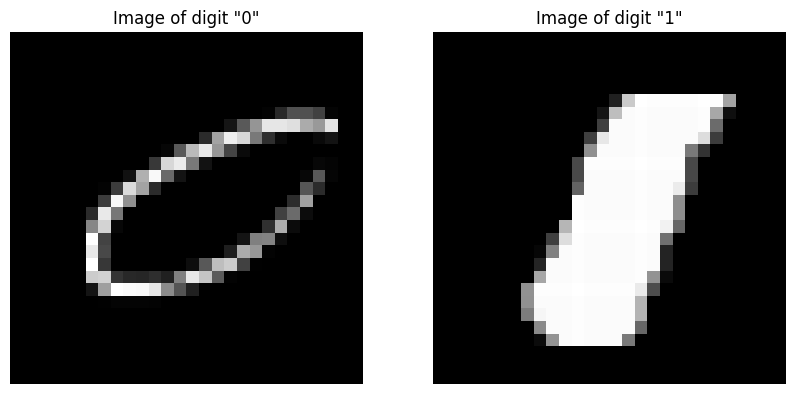

In [ ]:
digits_square = digits.reshape(digits.shape[0],img_size, img_size)

fig, axes = plt.subplots(1, 2, figsize=(10, 10)) # Create a figure with 1 row and 2 columns of subplots

# Display the first image
axes[0].imshow(digits_square[11292], cmap='gray')
axes[0].set_title('Image of digit "0"')
axes[0].axis('off')

# Display the second image
axes[1].imshow(digits_square[897], cmap='gray')
axes[1].set_title('Image of digit "1"')
axes[1].axis('off')

plt.show()

In [ ]:
# Print Mean and Standard Deviation
index_values = ['Mean', 'St.D.']
column_values = np.array([i for i in range(10)])
combined_arrays = np.vstack((ink_mean, ink_std))
digits_stats = pd.DataFrame(data=combined_arrays, index = index_values, columns = column_values)
print()

In [ ]:
digits_stats

,0,1,2,3,4,5,6,7,8,9
Mean,34632.407551,15188.466268,29871.099354,28320.188003,24232.722495,25835.920422,27734.917331,22931.244263,30184.148413,24553.75000
St.D.,8461.892043,4409.461697,7653.006199,7574.104536,6374.633457,7526.602989,7530.503187,6168.340878,7777.396357,6465.23133


<Axes: >

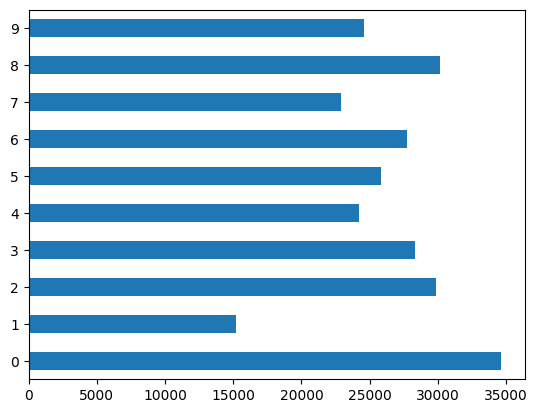

In [ ]:
digits_stats.iloc[0].plot(kind="barh")

[0 1 2 3 4 5 6 7 8 9]


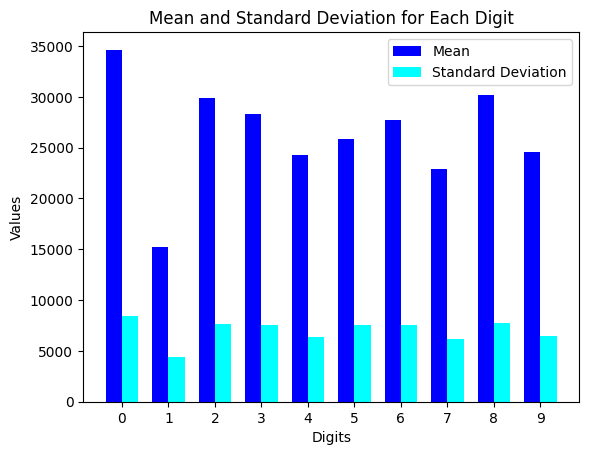

In [ ]:
digits_stat = np.arange(len(ink_mean))  # This will be your x locations for the groups
print(digits_stat)
# Width of the bars
bar_width = 0.35

# Create the bars for the means
plt.bar(digits_stat - bar_width/2, ink_mean, bar_width, label='Mean', color='blue')

# Create the bars for the means plus standard deviation
plt.bar(digits_stat + bar_width/2,  ink_std, bar_width, label='Standard Deviation', color='cyan')

# Add some labels, title, and legend
plt.xlabel('Digits')
plt.ylabel('Values')
plt.title('Mean and Standard Deviation for Each Digit')
plt.xticks(digits_stat, [str(digit) for digit in range(10)])  # Set x-tick labels as digits
plt.legend()

# Show the plot
plt.show()


<Axes: >

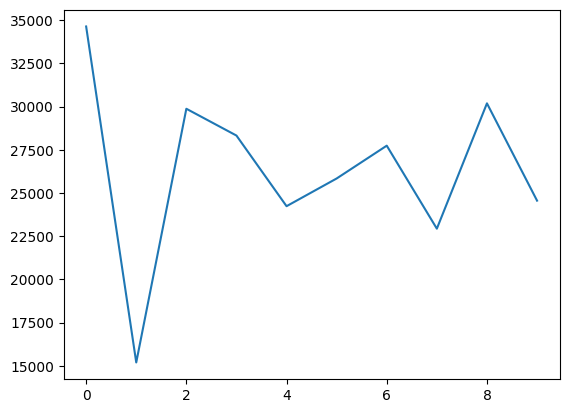

In [ ]:
digits_stats.iloc[0].plot(kind="line")

<Axes: >

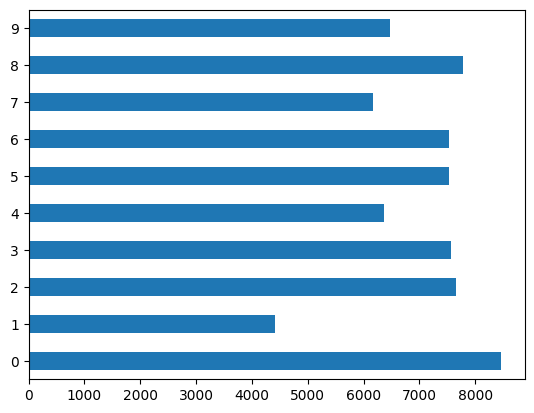

In [ ]:
digits_stats.iloc[1].plot(kind="barh")

<Axes: >

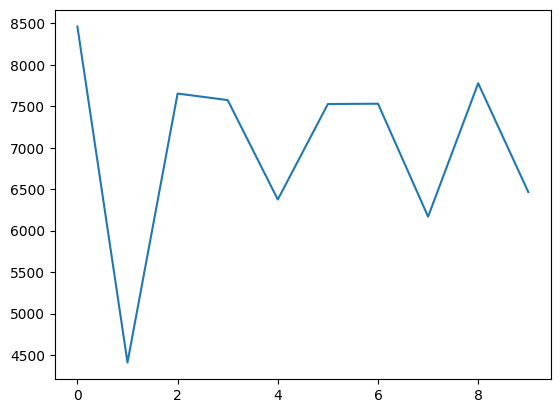

In [ ]:
digits_stats.iloc[1].plot(kind="line")

In [ ]:
# Scaling the features to have zero mean
print(ink)
ink_scaled = scale(ink).reshape(-1, 1)
print(ink_scaled)

NameError: ignored

In [ ]:
# Multinomial Logistic Regression model for the ink feature

model_ink = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_ink.fit(ink_scaled, labels)
predicted_labels = model_ink.predict(ink_scaled)
print(predicted_labels)

[1 0 1 ... 2 3 1]


[1 0 1 ... 7 6 9]


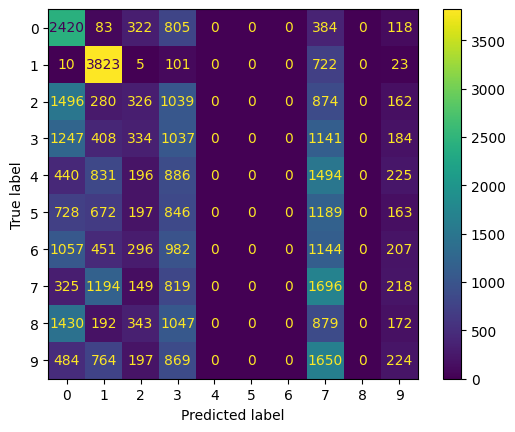

In [ ]:
# Confusion Matrix for the ink feature
print(labels)
cm_ink = confusion_matrix(labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ink, display_labels=model_ink.classes_)
disp.plot()
plt.show()

In [ ]:
# Accuracy for ink feature

accuracy_ink = sum(cm_ink.diagonal())/cm_ink.sum()
accuracy_ink

0.22680952380952382

In [ ]:
# Same model with Grig Search
from sklearn.model_selection import GridSearchCV
# Create the log reg model
model_ink = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Determine C values
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Grid Search with Cross-Validation
param_grid_ink = {'C': C_values}
grid_search_ink = GridSearchCV(model_ink, param_grid_ink, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_ink.fit(ink_scaled, labels.ravel())

best_C_ink = grid_search_ink.best_params_['C']
best_score_ink = grid_search_ink.best_score_

print(f"Best C: {best_C_ink}")
print(f"Best Cross-Validation Score: {best_score_ink}")

Best C: 10
Best Cross-Validation Score: 0.2267380952380952


In [ ]:
# Model with the best score

model_ink_best_c = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', C=best_C_ink, max_iter=1000)
model_ink_best_c.fit(ink_scaled, labels.ravel())

# Evaluate on Test Data
test_accuracy_ink = model_ink_best_c.score(ink_scaled, labels)
print(f"Test Accuracy: {test_accuracy_ink}")


Test Accuracy: 0.22690476190476191


Best Hyperparameters: {'C': 1.0}
Accuracy: 0.265


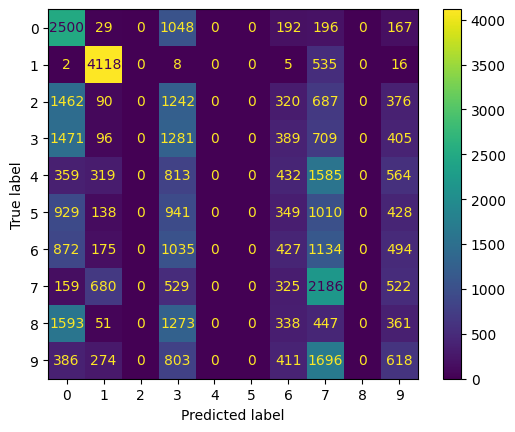

In [ ]:
#--------------------------------------------------------------------------------------------
#Local Binary Patterns (LBG) --> Local Binary Patterns represent the local texture patterns in an image.
#It involves comparing each pixel with its neighboring pixels and encoding the result as a binary pattern.

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from skimage import feature
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV




labels = mnist_data[:, 0]
digits = mnist_data[:, 1:]

# Function to compute LBP features for each single image
def compute_lbp(image):
    image_2d = image.reshape((28, 28))
    lbp = feature.local_binary_pattern(image_2d, P=8, R=1, method='uniform')
    return lbp.flatten()

# Compute LBP for all images
lbp_features = np.array([compute_lbp(image) for image in digits])

# Calculate the mean of LBP values for each image
lbp_mean = np.mean(lbp_features, axis=1)

#----------------------grid search---------------------


X_lbp = lbp_mean.reshape(-1, 1)
y_labels = labels

param_grid = {'C': np.logspace(-3, 2, 6)}  # This creates values from 0.001 to 100 in a logarithmic scale

model_lbp = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

grid_search = GridSearchCV(model_lbp, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_lbp, y_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

#---------------------grid search----------------------

# Reshape to make it a 2D array
X_lbp = lbp_mean.reshape(-1, 1)
y_labels = labels

X_train, y_train = X_lbp, y_labels
X_test, y_test = X_lbp, y_labels

# Train a logistic regression model
model_lbp = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000 , C=1.9)
model_lbp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_lbp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix for the LBP feature
cm_LBP = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_LBP, display_labels=model_lbp.classes_)
disp.plot()
plt.show()









In [ ]:
#---------------------------------------------------------------------------------------------------------------------------

In [ ]:
### Horizontal Mirroring ### (A feature that i thought that I didn't include)
digits.shape

(42000, 784)

In [ ]:
mirroring_scaled = scale(digits)

In [ ]:
mirroring_scaled.shape

(42000, 784)

In [ ]:
# Turning the 1x784 digit vector into a 28x28

digits_square = mirroring_scaled.reshape(digits.shape[0],img_size, img_size)

In [ ]:
digits_square.shape

(42000, 28, 28)

In [ ]:
# Split the images to upper and lower half

digits_splitted = digits_square.reshape(digits_square.shape[0],2,int(digits_square.shape[1]/2),digits_square.shape[2])

In [ ]:
digits_splitted.shape

(42000, 2, 14, 28)

In [ ]:
# Create 2 arrays, one for the upper half and one for the lower

upper_half = digits_splitted[:,0,:,:]
bottom_half = digits_splitted[:,1,:,:]

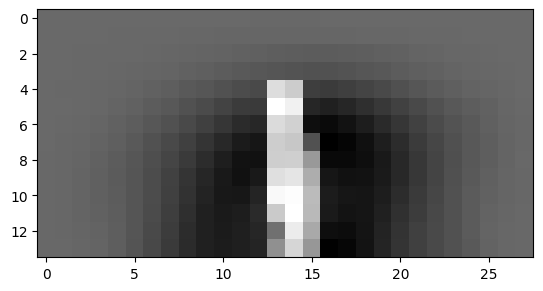

In [ ]:
plt.imshow(upper_half[2,:,:], cmap='gray')

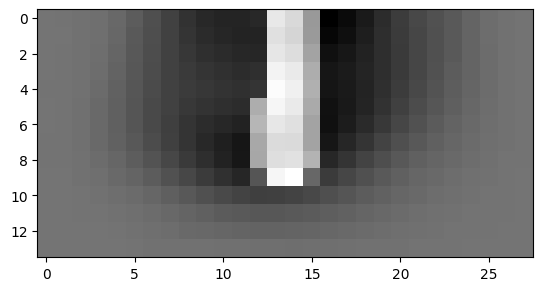

In [ ]:
plt.imshow(bottom_half[2,:,:], cmap='gray')

In [ ]:
# Flip the bottom half in order to be able to compare them

bottom_half = np.flip(bottom_half, axis=1)

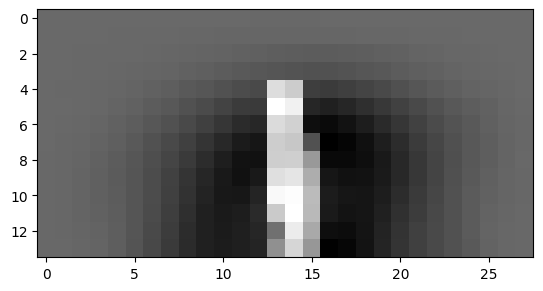

In [ ]:
plt.imshow(upper_half[2,:,:], cmap='gray')

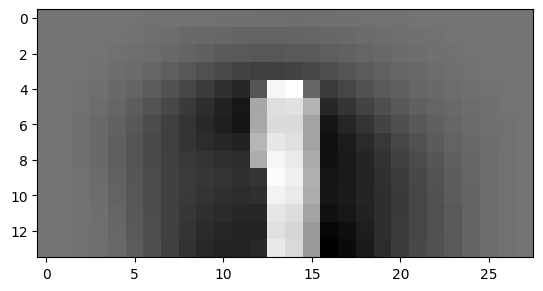

In [ ]:
plt.imshow(bottom_half[2,:,:], cmap='gray')

In [ ]:
bottom_half.shape

(42000, 14, 28)

In [ ]:
# Find the similarity between the two images


# Calculate similarity for each pair
similarities = np.array([ssim(upper_half[i], bottom_half[i]) for i in range(digits.shape[0])])


In [ ]:
similarities.shape

(42000,)

In [ ]:
similarities = similarities.reshape(-1,1)

In [ ]:
similarities.shape

(42000, 1)

In [ ]:
# Multinomial Logistic Regression model for the mirroring feature

model_mirror = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_mirror.fit(similarities.reshape(-1, 1), labels)
predicted_labels = model_mirror.predict(similarities.reshape(-1, 1))

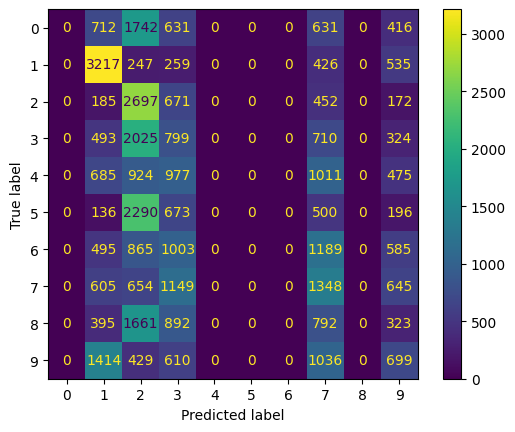

In [ ]:
# Confusion Matrix for the mirror feature

cm_mirror = confusion_matrix(labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mirror, display_labels=model_mirror.classes_)
disp.plot()
plt.show()

In [ ]:
# Accuracy for the mirror feature

accuracy_mirror = sum(cm_mirror.diagonal())/cm_mirror.sum()
accuracy_mirror

0.20857142857142857

In [ ]:
import numpy as np

def crop_image_to_digit(img, background=0.0):
    """
    Crop the 28x28 MNIST image to the smallest rectangle containing the digit.
    Pixels are assumed to be 0 for the background and positive for the digit.

    Parameters:
    - img: A 28x28 numpy array representing the image.

    Returns:
    - A numpy array of the cropped image.
    """
    # Find the bounding box of the non-zero pixels
    rows = np.any(img != background, axis=1)
    cols = np.any(img != background, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    # Crop the image to the bounding box
    cropped_img = img[rmin:rmax+1, cmin:cmax+1]

    # Check if the height is odd
    if cropped_img.shape[0] % 2 != 0:
        # Add a row of zeros at the bottom
        cropped_img = np.pad(cropped_img, ((0, 1), (0, 0)), 'constant')

    return cropped_img

# Assuming 'digits' is an array containing multiple 28x28 images
# Example: digits.shape could be (n_images, 28, 28)
digits_cropped = [crop_image_to_digit(img) for img in digits_square]


In [ ]:
# Split the images to upper and lower half
# Create lists to store the halves
upper_half_list = []
bottom_half_list = []

# Function to split the image into upper and lower halves
def split_image(img):
    # Calculate the split index. If the number of rows is odd, the bottom half will have the extra row.
    split_index = img.shape[0] // 2
    upper_half = img[:split_index, :]
    bottom_half = img[split_index:, :]
    return upper_half, bottom_half

# Split the cropped images and store the halves
for cropped_img in digits_cropped:
    upper, bottom = split_image(cropped_img)
    upper_half_list.append(upper)
    bottom_half_list.append(bottom)

# upper_half = np.array(upper_half_list)
# bottom_half = np.array(bottom_half_list)


In [ ]:
# Print the shapes of the first few cropped images before splitting
for i, img in enumerate(digits_square[:5]):
    cropped = crop_image_to_digit(img)
    print(f"Cropped image {i} shape: {cropped.shape}")


Cropped image 0 shape: (28, 28)
Cropped image 1 shape: (28, 28)
Cropped image 2 shape: (28, 28)
Cropped image 3 shape: (28, 28)
Cropped image 4 shape: (28, 28)


In [ ]:
def scale_images(image_list):
    scaled_images = []
    for img in image_list:
        # Flatten the image
        flattened = img.flatten()

        # Scale the flattened image
        scaled_flattened = scale(flattened)

        # Reshape back to original shape and append to the list
        scaled_images.append(scaled_flattened.reshape(img.shape))

    return scaled_images

# Apply the scaling to upper and bottom half lists
upper_half_list_scaled = scale_images(upper_half_list)
bottom_half_list_scaled = scale_images(bottom_half_list)


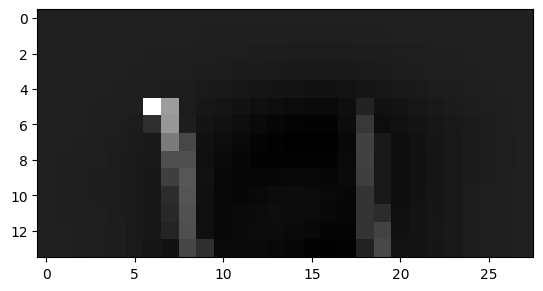

In [ ]:
plt.imshow(upper_half_list_scaled[3], cmap='gray')
plt.show()

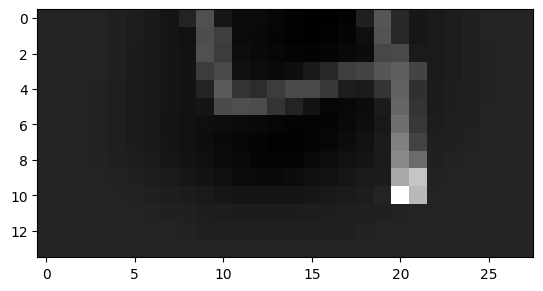

In [ ]:
plt.imshow(bottom_half_list_scaled[3], cmap='gray')
plt.show()

In [ ]:
# Flip the bottom half in order to be able to compare them

flipped_bottom_half = [np.flip(img, axis=0) for img in bottom_half_list_scaled]

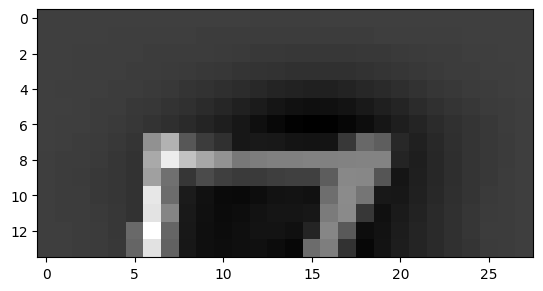

In [ ]:
plt.imshow(upper_half_list_scaled[6], cmap='gray')
plt.show()

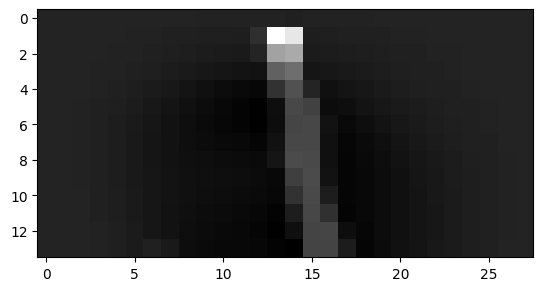

In [ ]:
plt.imshow(flipped_bottom_half[6], cmap='gray')
plt.show()

In [ ]:
'''
Pixel-wise Absolute Difference:
Calculate the absolute difference between corresponding pixels and then take the mean of these differences.
'''

def pixelwise_abs_diff(imageA, imageB):
    return np.abs(imageA - imageB).mean()

similarities = [pixelwise_abs_diff(upper_half_list_scaled[i], flipped_bottom_half[i]) for i in range(len(upper_half_list_scaled))]


In [ ]:
len(similarities)

42000

In [ ]:
similarities_np = similarities_np.reshape(-1,1)

NameError: ignored

In [ ]:
# Multinomial Logistic Regression model for the mirroring feature

model_mirror = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_mirror.fit(similarities_np.reshape(-1, 1), labels)
predicted_labels = model_mirror.predict(similarities_np.reshape(-1, 1))

In [ ]:
# Confusion Matrix for the mirror feature

cm_mirror = confusion_matrix(labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mirror, display_labels=model_mirror.classes_)
disp.plot()
plt.show()

In [ ]:
# Accuracy for the mirror feature

accuracy_mirror = sum(cm_mirror.diagonal())/cm_mirror.sum()
accuracy_mirror

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Same model with Grig Search

# Create the log reg model
model_mirror = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Determine C values
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Grid Search with Cross-Validation
param_grid_mirror = {'C': C_values}
grid_search_mirror = GridSearchCV(model_mirror, param_grid_mirror, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_mirror.fit(similarities.reshape(-1, 1), labels.ravel())

best_C_mirror = grid_search_mirror.best_params_['C']
best_score_mirror = grid_search_mirror.best_score_

print(f"Best C: {best_C_mirror}")
print(f"Best Cross-Validation Score: {best_score_mirror}")

In [ ]:
# Model with the best score

model_mirror_best_c = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', C=best_C_mirror, max_iter=1000)
model_mirror_best_c.fit(similarities.reshape(-1, 1), labels.ravel())

# Evaluate on Test Data
test_accuracy_mirror = model_mirror_best_c.score(similarities.reshape(-1, 1), labels)
print(f"Test Accuracy: {test_accuracy_mirror}")


In [ ]:
#---------------------------------------------------------------------------------------------------------------------------

In [ ]:
digits.shape

(42000, 784)

In [ ]:
### Center Mass ###

# Reshape digits from (42000, 784) to (42000, 28, 28)
images = digits.reshape(-1, 28, 28)

# Create a grid of coordinates
x, y = np.meshgrid(np.arange(28), np.arange(28))

# Calculate the distance of each coordinate from the center
center_x, center_y = 13.5, 13.5  # Center for a 28x28 image
dist_from_center = np.sqrt((x - center_x)**2 + (y - center_y)**2)

# Apply the distance weights to each image
weighted_sums = np.sum(images * dist_from_center, axis=(1, 2))


In [ ]:
# Scaling the values to have mean 0

weighted_sums_rescaled = scale(weighted_sums).reshape(-1, 1)

In [ ]:
weighted_sums_rescaled.shape

In [ ]:
# Multinomial Logistic Regression model for the Center MAss feature

from sklearn.linear_model import LogisticRegression
model_center_mass = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_center_mass.fit(weighted_sums_rescaled, labels)
predicted_labels = model_center_mass.predict(weighted_sums_rescaled)

In [ ]:
# Confusion Matrix for the Center Mass feature

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_center_mass.classes_)
disp.plot()
plt.show()

In [ ]:
# Accuracy for the Center Mass feature

accuracy = sum(cm.diagonal())/cm.sum()
accuracy

In [ ]:
# Same model with Grig Search

# Create the log reg model
model_center_mass = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Determine C values
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Grid Search with Cross-Validation
param_grid_center_mass = {'C': C_values}
grid_search_center_mass = GridSearchCV(model_center_mass, param_grid_center_mass, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_center_mass.fit(weighted_sums_rescaled, labels.ravel())

best_C_center_mass = grid_search_center_mass.best_params_['C']
best_score_center_mass = grid_search_center_mass.best_score_

print(f"Best C: {best_C_center_mass}")
print(f"Best Cross-Validation Score: {best_score_center_mass}")

In [ ]:
# Model with the best score

model_center_mass_best_c = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', C=best_C_center_mass, max_iter=1000)
model_center_mass_best_c.fit(weighted_sums_rescaled, labels.ravel())

# Evaluate on Test Data
test_accuracy_center_mass = model_center_mass_best_c.score(weighted_sums_rescaled, labels)
print(f"Test Accuracy: {test_accuracy_center_mass}")

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------

In [ ]:
lbp_features.shape

(42000, 784)

In [ ]:
X_lbp.shape

(42000, 1)

In [ ]:
ink_scaled.shape

(42000, 1)

In [ ]:
weighted_sums_rescaled.shape

NameError: ignored

In [ ]:
### Combine the Ink and Center Mass feature ###

combined_features = np.hstack(( weighted_sums_rescaled,ink_scaled))

# Train the model on the combined features
model_combined = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
model_combined.fit(combined_features, labels)

# Predict and evaluate
predicted_labels_combined = model_combined.predict(combined_features)

# Confusion Matrix
cm_combined = confusion_matrix(labels, predicted_labels_combined)
disp_combined = ConfusionMatrixDisplay(confusion_matrix=cm_combined, display_labels=model_combined.classes_)
disp_combined.plot()
plt.show()



In [ ]:
combined_features.shape

NameError: ignored

In [ ]:
# Accuracy of conbined features

accuracy_combined = sum(cm_combined.diagonal())/cm_combined.sum()
accuracy_combined

In [ ]:
# Same model with Grig Search


# Create the log reg model
model_combined = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)

# Determine C values
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Grid Search with Cross-Validation
param_grid_combined = {'C': C_values}
grid_search_combined = GridSearchCV(model_combined, param_grid_combined, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_combined.fit(combined_features, labels.ravel())

best_C_combined = grid_search_combined.best_params_['C']
best_score_combined = grid_search_combined.best_score_

print(f"Best C: {best_C_combined}")
print(f"Best Cross-Validation Score: {best_score_combined}")

In [ ]:
# Model with the best score

model_combined_best_c = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', C=best_C_combined, max_iter=1000)
model_combined_best_c.fit(combined_features, labels.ravel())

# Evaluate on Test Data
test_accuracy_combined = model_combined_best_c.score(combined_features, labels)
print(f"Test Accuracy: {test_accuracy_combined}")

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Reducing the size of the images
# We will use the digits_square array that containt the image data in the correct form

digits_square.shape

(42000, 28, 28)

In [ ]:
# Extract the dimensions of digits_square
(N,H,W) = digits_square.shape
# Half the Height and Width
new_H = int(H/2)
new_W = int(W/2)
# Initialize the resized array as an empty array
digits_square_resized = np.empty((N,new_H,new_W))
# Change the 'dtype' of digits_square because it is required by cv2
digits_square = np.array(digits_square, dtype='uint8')
# Resize every image
for i in range(N):
    digits_square_resized[i] = cv2.resize(digits_square[i],(new_H,new_W))

In [ ]:
digits_square_resized.shape

(42000, 14, 14)

In [ ]:
labels_reshaped = labels.reshape(-1,1)
labels_reshaped.shape

(42000, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits_square_resized, labels_reshaped, test_size=37000, random_state=42)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (5000, 14, 14)
X_test (37000, 14, 14)
y_train (5000, 1)
y_test (37000, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[8 6 2 ... 2 6 0]


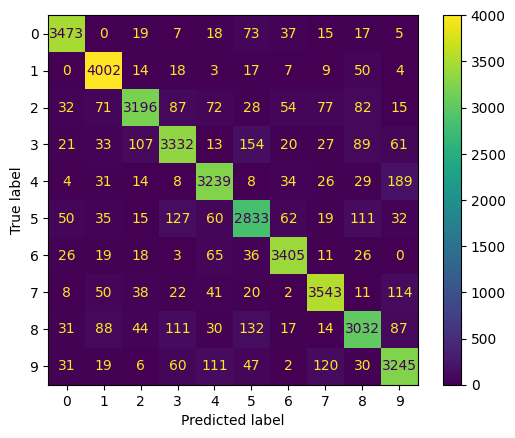

In [ ]:
# Flatten the train and teest data
X_train_flattened = X_train.reshape(X_train.shape[0],-1)
X_test_flattened = X_test.reshape(X_test.shape[0],-1)

# Scale the data
X_train_flattened_scaled = scale(X_train_flattened)
X_test_flattened_scaled = scale(X_test_flattened)

mult_logit_model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', max_iter=1000)
mult_logit_model.fit(X_train_flattened_scaled, y_train.ravel())
print(y_train.ravel())
real_labels_logit=y_train.ravel()

# Predict and evaluate
predicted_labels_mult_logit_model = mult_logit_model.predict(X_test_flattened_scaled)

# Confusion Matrix
cm_mult_logit_model = confusion_matrix(y_test, predicted_labels_mult_logit_model)
disp_mult_logit_model = ConfusionMatrixDisplay(confusion_matrix=cm_mult_logit_model, display_labels=mult_logit_model.classes_)
disp_mult_logit_model.plot()
plt.show()



In [ ]:
# Accuracy of combined features

accuracy_combined = sum(cm_mult_logit_model.diagonal())/cm_mult_logit_model.sum()
accuracy_combined

0.8355405405405405

In [ ]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

from sklearn.model_selection import GridSearchCV

# Logistic Regression Model with L1 penalty
lasso_logit_model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', max_iter=1000)

# Grid Search with Cross-Validation
param_grid = {'C': C_values}
grid_search = GridSearchCV(lasso_logit_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_flattened_scaled, y_train.ravel())

best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Best C: {best_C}")
print(f"Best Cross-Validation Score: {best_score}")


Best C: 100
Best Cross-Validation Score: 0.8446


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Train the final model with the best C value
final_model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', C=best_C, max_iter=1000)
final_model.fit(X_train_flattened_scaled, y_train.ravel())

# Evaluate on Test Data
test_accuracy = final_model.score(X_test_flattened_scaled, y_test)
print(f"Test Accuracy: {test_accuracy}")


Test Accuracy: 0.8339189189189189


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[8 6 2 ... 2 6 0]
Best Parameters: {'C': 59.686015794648696, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


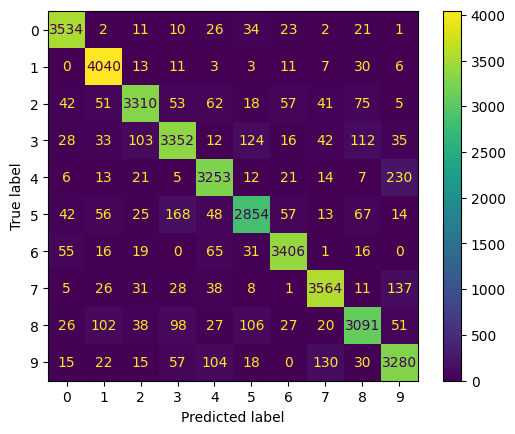

Accuracy with Grid search for Best Hyper-parameters: 0.9103783783783784


In [ ]:
#--------------------------------------SVM--------------------------------------------------

import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


(N, H, W) = digits_square_resized.shape

new_H = int(H / 2)
new_W = int(W / 2)

digits_square_resized_flattened = np.empty((N, new_H * new_W))


for i in range(N):
    digits_square_resized_flattened[i] = cv2.resize(digits_square_resized[i], (new_H, new_W)).flatten()

labels_reshaped = labels.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(digits_square_resized_flattened, labels_reshaped, test_size=37000, random_state=42)

X_train_flattened_scaled = scale(X_train)
X_test_flattened_scaled = scale(X_test)
# ------------------------------GridSearch----------------------------
param_dist = {
    'C': uniform(loc=0.001, scale=100),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}
 # 'degree': [2, 3, 4],
  #  'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))

svm_model = SVC()


random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)


random_search.fit(X_train_flattened_scaled, y_train.ravel())

print(y_train.ravel())
real_labels=y_train.ravel()

print("Best Parameters:", random_search.best_params_)

X_train, X_test, y_train, y_test = train_test_split(digits_square_resized_flattened, labels_reshaped, test_size=37000, random_state=42)

X_train_flattened_scaled = scale(X_train)
X_test_flattened_scaled = scale(X_test)

svm_model = SVC(**random_search.best_params_)

svm_model.fit(X_train_flattened_scaled, y_train)



predicted_labels_svm_grid = svm_model.predict(X_test_flattened_scaled)
# ------------------------------GridSearch----------------------------
# Comfusion Matrix
cm_svm_grid = confusion_matrix(y_test, predicted_labels_svm_grid)
disp_svm_grid = ConfusionMatrixDisplay(confusion_matrix=cm_svm_grid, display_labels=svm_model.classes_)
disp_svm_grid.plot()
plt.show()

# SVM Accuracy
accuracy_svm_grid = accuracy_score(y_test, predicted_labels_svm_grid)
print("Accuracy with Grid search for Best Hyper-parameters:", accuracy_svm_grid)


In [ ]:
#--------------------------------------------------------------- McNemar-BowkerStatisticalTest------------------------------------------------------------------------
from statsmodels.stats.contingency_tables import mcnemar

predictions_svm = predicted_labels_svm_grid  # svm predictions
predictions_logistic = predicted_labels_mult_logit_model  #  Logistic Regression predictions
y_true = real_labels  # Real labels

# contingency table for McNemar-Bowker Test
contingency_table = np.zeros((10, 10), dtype=int)

for i in range(len(y_true)):
    contingency_table[y_true[i], predictions_svm[i]] += 1
    contingency_table[y_true[i], predictions_logistic[i]] += 1

print(contingency_table)
# Run McNemar-Bowker Test
result = mcnemar(contingency_table)


print("McNemar-Bowker Test Statistic:", result.statistic)
print("P-value:", result.pvalue)

if result.pvalue < 0.05:
    print("There is a significant statistical difference")
else:
    print("There is no significant statistical difference")






[[ 94  86  69 100 109  85  69 108 122  94]
 [127 151 145 124 107  75  90  97 101 103]
 [ 89 114  92 109  82  60  82  98  98 102]
 [103 129  88 106  99  76 111 113  72  91]
 [ 83 107 110 108  94  94 115  87  83  99]
 [ 75 121  65  90  98  79  88 101  94  91]
 [ 86 136  96 111  82  88 108 141  95 113]
 [101 115 101 136  92  86 126 138 115  94]
 [103 118  88 100  98  87  90 100  86  84]
 [ 80  96 105 105 108  82 104 107 113 134]]
McNemar-Bowker Test Statistic: 86.0
P-value: 0.005999210847601087
There is a significant statistical difference


In [ ]:
#--------------------------------------------------------One-way ANOVA-----------------------------------------------------------
from scipy.stats import f_oneway

accuracy_per_class_SVM = cm_svm_grid.diagonal() / cm_svm_grid.sum(axis=1)
accuracy_per_class_Logistic = cm_mult_logit_model.diagonal() / cm_mult_logit_model.sum(axis=1)


for i in range(len(accuracy_per_class_SVM)):
    print(f"Accuracy for Class {i}: {accuracy_per_class_SVM[i]}")
    print(f"Accuracy for Class {i}: {accuracy_per_class_Logistic[i]}")



accuracies_svm = accuracy_per_class_SVM[0:9]
accuracies_logistic =accuracy_per_class_Logistic[0:9]



f_statistic, p_value = f_oneway(accuracies_svm, accuracies_logistic)

print("One-way ANOVA F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference between the classifiers.")
else:
    print("No significant difference between the classifiers.")

Accuracy for Class 0: 0.9645196506550219
Accuracy for Class 0: 0.9478711790393013
Accuracy for Class 1: 0.979631425800194
Accuracy for Class 1: 0.9704170708050437
Accuracy for Class 2: 0.8912224017232094
Accuracy for Class 2: 0.8605277329025309
Accuracy for Class 3: 0.8690692247861032
Accuracy for Class 3: 0.8638838475499092
Accuracy for Class 4: 0.9081518704634283
Accuracy for Class 4: 0.9042434394193188
Accuracy for Class 5: 0.8534688995215312
Accuracy for Class 5: 0.847188995215311
Accuracy for Class 6: 0.9437517317816569
Accuracy for Class 6: 0.943474646716542
Accuracy for Class 7: 0.9259547934528449
Accuracy for Class 7: 0.9204988308651598
Accuracy for Class 8: 0.8619631901840491
Accuracy for Class 8: 0.8455103179029559
Accuracy for Class 9: 0.893489512394443
Accuracy for Class 9: 0.8839553255243803
One-way ANOVA F-statistic: 0.22535071376759755
P-value: 0.6414075103952497
No significant difference between the classifiers.
